In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('test.QTX') as f:
    contents = f.read()
    print(contents)

[STANDARD_DATA          0]
STD_NAME=BEACH BALL BLUE 607
STD_DATETIME=1348927687,
STD_REFLPOINTS=35,
STD_REFLINTERVAL=10,
STD_REFLLOW=360,
STD_VIEWING=%R LAV SCI UV UV Cal
STD_GUID=0a69d9a5-c28e-4af8-8ac1-15d1ccef5a9e
STD_R=21.2400,24.0800,27.2200,30.7600,34.8800,39.4800,44.1700,49.0100,52.8800,53.8400,52.3200,49.7800,46.5300,42.9700,39.4400,36.1000,32.8900,29.8100,26.9400,24.4000,22.1800,20.0700,18.2700,16.7900,15.6200,15.0700,14.9200,14.9200,15.2500,15.6500,15.3400,14.9500,16.0300,20.8000,29.3400
STD_INSTRUMENT_SERIAL_NO=
[STANDARD_DATA          1]
STD_NAME=KHAKI 681
STD_DATETIME=1209496566,
STD_REFLPOINTS=31,
STD_REFLINTERVAL=10,
STD_REFLLOW=400,
STD_VIEWING=%R LAV  SCI UV 400
STD_GUID=2716f077-808e-404c-99ab-1824e8039174
STD_R=23.7000,22.8400,22.3200,22.1000,22.2300,22.9700,24.1800,25.5100,26.9700,28.2900,29.8100,30.9000,31.6000,32.2100,32.2600,31.5000,31.0800,32.0000,34.0900,35.9100,36.5400,36.1700,35.9100,37.3200,41.0300,47.0000,54.2600,61.8000,68.5500,73.0300,76.5900
STD_INSTRUME

## No. of Standards

In [3]:
target = 'STANDARD_DATA'

with open('test.QTX') as f:
    lines = f.readlines()
    i,j = 1,1
    for row in lines:
        #print(row)
        if row.find(target) != -1:
            print('true, ', row.find(target), '; line no: ', i, '; occurence: ',j)
            j = j + 1
        i = i + 1
print('total occurences: ', j-1)

true,  1 ; line no:  1 ; occurence:  1
true,  1 ; line no:  11 ; occurence:  2
total occurences:  2


In [4]:
target = 'STD_REFLLOW'

with open('test.QTX') as f:
    for index, line in enumerate(f):
        if target in line:
            print('string found in a file')
            break
        else: 
            print('string does not exist in a file')

string does not exist in a file
string does not exist in a file
string does not exist in a file
string does not exist in a file
string does not exist in a file
string found in a file


## Starting wavelength

In [5]:
with open('test.QTX') as f:
    lines = f.readlines()
    #i = 1
    for row in lines:
        z = re.match("STD_REFLLOW=(\d+),", row)
        if z:
            #print(z)
            ref_val = (z.groups()[0])
            print(ref_val)
            print(type(ref_val))
            ref = int(ref_val)
            print(type(ref))

360
<class 'str'>
<class 'int'>
400
<class 'str'>
<class 'int'>


## Wavelength intervals

In [7]:
with open('test.QTX') as f:
    lines = f.readlines()
    #i = 1
    for row in lines:
        z = re.match("STD_REFLINTERVAL=(\d+),", row)
        if z:
            #print(z)
            ref_val = (z.groups()[0])
            print(ref_val)
            print(type(ref_val))
            ref = int(ref_val)
            print(type(ref))

10
<class 'str'>
<class 'int'>
10
<class 'str'>
<class 'int'>


## Total reflection points

In [8]:
with open('test.QTX') as f:
    lines = f.readlines()
    #i = 1
    for row in lines:
        z = re.match("STD_REFLPOINTS=(\d+),", row)
        if z:
            #print(z)
            ref_val = (z.groups()[0])
            print(ref_val)
            print(type(ref_val))
            ref = int(ref_val)
            print(type(ref))

35
<class 'str'>
<class 'int'>
31
<class 'str'>
<class 'int'>


## Ending Wavelength

In [64]:
with open('test.QTX') as f:
    lines = f.read()
    z = re.findall("STD_REFLLOW=(\d+),", lines)
    print('Starting wavelength: ', z)
    a = re.findall("STD_REFLPOINTS=(\d+),", lines)
    print('Total refl points: ', a)
    b = re.findall("STD_REFLINTERVAL=(\d+),", lines)
    print('Intervals: ', b)
    c = re.findall("STD_R[=,](.+)", lines)
    print('Ref values: ', c)
    if z:
        for i,j in enumerate(z):
            ref_low = int(z[i])
            ref_pts = int(a[i])
            ref_intv = int(b[i])
            print(ref_low)
            print(ref_pts)
            print(ref_intv)
            print(f'Ending wavelength for {j}: ', ref_low+ref_pts*ref_intv)
            print('Reflectance points', str(c[i]).split(','))

Starting wavelength:  ['360', '400']
Total refl points:  ['35', '31']
Intervals:  ['10', '10']
Ref values:  ['21.2400,24.0800,27.2200,30.7600,34.8800,39.4800,44.1700,49.0100,52.8800,53.8400,52.3200,49.7800,46.5300,42.9700,39.4400,36.1000,32.8900,29.8100,26.9400,24.4000,22.1800,20.0700,18.2700,16.7900,15.6200,15.0700,14.9200,14.9200,15.2500,15.6500,15.3400,14.9500,16.0300,20.8000,29.3400', '23.7000,22.8400,22.3200,22.1000,22.2300,22.9700,24.1800,25.5100,26.9700,28.2900,29.8100,30.9000,31.6000,32.2100,32.2600,31.5000,31.0800,32.0000,34.0900,35.9100,36.5400,36.1700,35.9100,37.3200,41.0300,47.0000,54.2600,61.8000,68.5500,73.0300,76.5900']
360
35
10
Ending wavelength for 360:  710
Reflectance points ['21.2400', '24.0800', '27.2200', '30.7600', '34.8800', '39.4800', '44.1700', '49.0100', '52.8800', '53.8400', '52.3200', '49.7800', '46.5300', '42.9700', '39.4400', '36.1000', '32.8900', '29.8100', '26.9400', '24.4000', '22.1800', '20.0700', '18.2700', '16.7900', '15.6200', '15.0700', '14.9200'

In [79]:
with open('test.QTX') as f:
    lines = f.read()
    z = re.findall("STD_REFLLOW=(\d+),", lines)
    print('Starting wavelength: ', z)
    a = re.findall("STD_REFLPOINTS=(\d+),", lines)
    print('Total refl points: ', a)
    b = re.findall("STD_REFLINTERVAL=(\d+),", lines)
    print('Intervals: ', b)
    c = re.findall("STD_R[=,](.+)", lines)
    #print('Ref values: ', c)
    #print(range())
    if z:
        for i,j in enumerate(z):
            ref_low = int(z[i])
            ref_pts = int(a[i])
            ref_intv = int(b[i])
            print(f'{ref_low=}')
            print(f'{ref_pts=}')
            print(f'{ref_intv=}')
            print('Wavelength values: ', [k for k in range(ref_low, ref_low+ref_pts*ref_intv, ref_intv)])
            #print(f'Ending wavelength for {j}: ', ref_low+ref_pts*ref_intv)
            print('Reflectance values: ', str(c[i]).split(','))

Starting wavelength:  ['360', '400']
Total refl points:  ['35', '31']
Intervals:  ['10', '10']
ref_low=360
ref_pts=35
ref_intv=10
Wavelength values:  [360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700]
Reflectance values:  ['21.2400', '24.0800', '27.2200', '30.7600', '34.8800', '39.4800', '44.1700', '49.0100', '52.8800', '53.8400', '52.3200', '49.7800', '46.5300', '42.9700', '39.4400', '36.1000', '32.8900', '29.8100', '26.9400', '24.4000', '22.1800', '20.0700', '18.2700', '16.7900', '15.6200', '15.0700', '14.9200', '14.9200', '15.2500', '15.6500', '15.3400', '14.9500', '16.0300', '20.8000', '29.3400']
ref_low=400
ref_pts=31
ref_intv=10
Wavelength values:  [400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700]
Reflectance values:  ['23.7000', '22.8400', '22.3200', '

Wavelength values:  [360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700]
Reflectance values:  ['21.2400', '24.0800', '27.2200', '30.7600', '34.8800', '39.4800', '44.1700', '49.0100', '52.8800', '53.8400', '52.3200', '49.7800', '46.5300', '42.9700', '39.4400', '36.1000', '32.8900', '29.8100', '26.9400', '24.4000', '22.1800', '20.0700', '18.2700', '16.7900', '15.6200', '15.0700', '14.9200', '14.9200', '15.2500', '15.6500', '15.3400', '14.9500', '16.0300', '20.8000', '29.3400']
     ref_val
360    21.24
370    24.08
380    27.22
390    30.76
400    34.88
410    39.48
420    44.17
430    49.01
440    52.88
450    53.84
460    52.32
470    49.78
480    46.53
490    42.97
500    39.44
510    36.10
520    32.89
530    29.81
540    26.94
550    24.40
560    22.18
570    20.07
580    18.27
590    16.79
600    15.62
610    15.07
620    14.92
630    14.92
640    15.25
650    

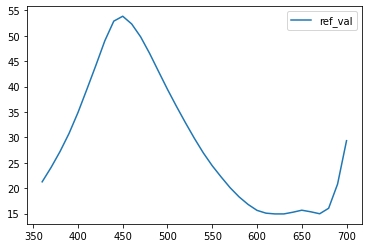

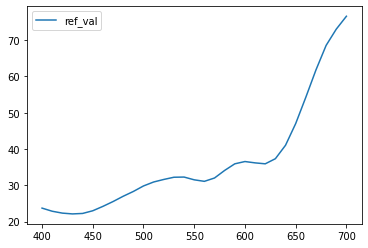

In [92]:
with open('test.QTX') as f:
    lines = f.read()
    z = re.findall("STD_REFLLOW=(\d+),", lines)
    a = re.findall("STD_REFLPOINTS=(\d+),", lines)
    b = re.findall("STD_REFLINTERVAL=(\d+),", lines)
    c = re.findall("STD_R[=,](.+)", lines)
    if z:
        for i,j in enumerate(z):
            ref_low = int(z[i])
            ref_pts = int(a[i])
            ref_intv = int(b[i])
            ref_val_list = str(c[i]).split(',')
            wave_list = [k for k in range(ref_low, ref_low+ref_pts*ref_intv, ref_intv)]
            print('Wavelength values: ', wave_list)
            print('Reflectance values: ', ref_val_list)
            sd_df = pd.DataFrame(ref_val_list, index=wave_list, columns=['ref_val'])
            sd_df['ref_val'] = sd_df['ref_val'].astype('float64')
            print(sd_df)
            sd_df.info()
            sd_df.plot()
